# Exploratory Data Analysis - Project 3, Part 2.2
* Jacob Wang
* 1/11/2023
* Coding Dojo Data Science Project 3

## Specifications
* Load in your csv.gz's of results for each year extracted.
* Concatenate the data into 1 dataframe for the remainder of the analysis.
* Once you have your data from the API, they would like you to perform some light EDA to show:
1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
    * Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
3. What is the average revenue per certification category?
4. What is the average budget per certification category?


In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df2 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [4]:
# concat 2000/2001
df = pd.concat((df1, df2), axis = 0)

In [5]:
budg_filter = df['budget'] > 0 
rev_filter = df['revenue'] > 0
df = df.loc[budg_filter | rev_filter]

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 1 to 2194
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                728 non-null    object 
 1   adult                  728 non-null    float64
 2   backdrop_path          580 non-null    object 
 3   belongs_to_collection  111 non-null    object 
 4   budget                 728 non-null    float64
 5   genres                 728 non-null    object 
 6   homepage               82 non-null     object 
 7   id                     728 non-null    float64
 8   original_language      728 non-null    object 
 9   original_title         728 non-null    object 
 10  overview               710 non-null    object 
 11  popularity             728 non-null    float64
 12  poster_path            695 non-null    object 
 13  production_companies   728 non-null    object 
 14  production_countries   728 non-null    object 
 15  relea

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.321,1162.0,PG-13
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,118.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,28.0,R
5,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,...,6297.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Don's Plum,0.0,5.423,65.0,NaN
8,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.695,2411.0,R


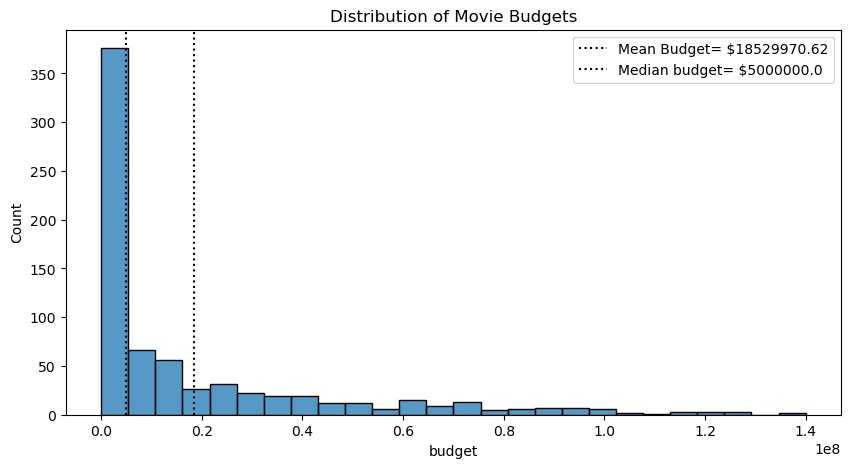

In [7]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='budget', ax=ax)
ax.set(title='Distribution of Movie Budgets');

## Annotating mean and median
mean_budg = df['budget'].mean()
ax.axvline(mean_budg,color='k', ls=':', 
           label=f"Mean Budget= ${round(mean_budg,2)}");

med_budg = df['budget'].median()
ax.axvline(med_budg,color='k', ls=':', 
           label=f"Median budget= ${round(med_budg,2)}");

ax.legend();

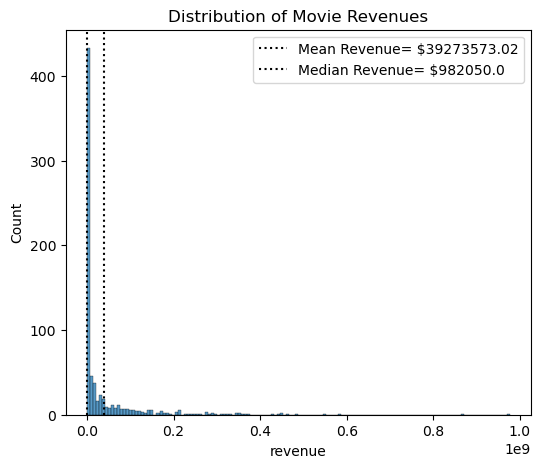

In [8]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(6,5))

## Plot histogram
sns.histplot(data=df, x='revenue', ax=ax)
ax.set(title='Distribution of Movie Revenues');

## Annotating mean and median
mean_rev = df['revenue'].mean()
ax.axvline(mean_rev,color='k', ls=':', 
           label=f"Mean Revenue= ${round(mean_rev,2)}");

med_rev = df['revenue'].median()
ax.axvline(med_rev,color='k', ls=':', 
           label=f"Median Revenue= ${round(med_rev,2)}");

ax.legend();

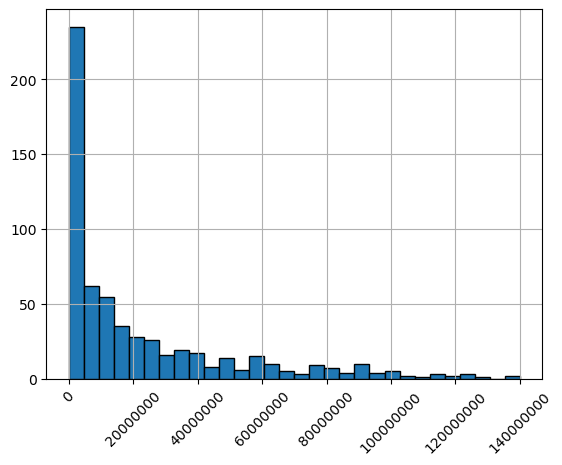

In [9]:
# display number of movies with budget > 0
bud_filter = df.loc[:, 'budget'] > 0
df.loc[bud_filter, 'budget'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

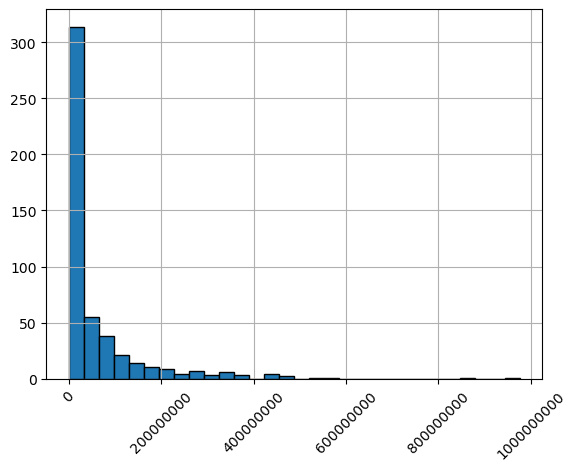

In [10]:
# Display revenues > 0 
rev_filter = df.loc[:, 'revenue'] > 0
df.loc[rev_filter, 'revenue'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

## Average Budget by Certification

In [11]:
df['certification'].value_counts()

R        231
PG-13    132
PG        35
NR        16
G         15
NC-17      1
Name: certification, dtype: int64

In [12]:
certBudget = df.groupby('certification')['budget'].mean()
certBudget

certification
G        3.822358e+07
NC-17    0.000000e+00
NR       6.693756e+06
PG       4.497857e+07
PG-13    4.283074e+07
R        1.974244e+07
Name: budget, dtype: float64

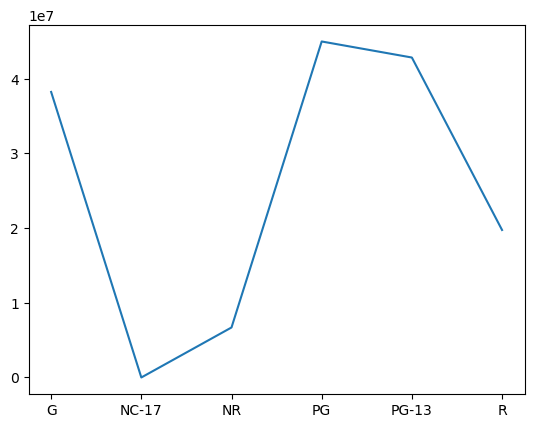

In [13]:
plt.plot(certBudget)

## Average Revenue by Certification

In [14]:
certRev = df.groupby('certification')['revenue'].mean()
certRev

certification
G        1.154965e+08
NC-17    1.167800e+04
NR       9.443087e+06
PG       1.123573e+08
PG-13    9.851100e+07
R        3.298427e+07
Name: revenue, dtype: float64

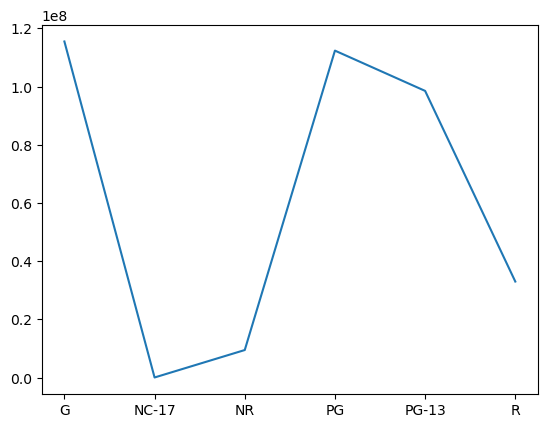

In [15]:
plt.plot(certRev)

In [16]:
# save merged df 
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [17]:
merged_df = pd.read_csv("Data/tmdb_results_combined.csv.gz")
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                728 non-null    object 
 1   adult                  728 non-null    float64
 2   backdrop_path          580 non-null    object 
 3   belongs_to_collection  111 non-null    object 
 4   budget                 728 non-null    float64
 5   genres                 728 non-null    object 
 6   homepage               82 non-null     object 
 7   id                     728 non-null    float64
 8   original_language      728 non-null    object 
 9   original_title         728 non-null    object 
 10  overview               710 non-null    object 
 11  popularity             728 non-null    float64
 12  poster_path            695 non-null    object 
 13  production_companies   728 non-null    object 
 14  production_countries   728 non-null    object 
 15  releas

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.321,1162.0,PG-13
1,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,118.0,PG-13
2,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,28.0,R
3,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,...,6297.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Don's Plum,0.0,5.423,65.0,NaN
4,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.695,2411.0,R
